# Random Forest Project

In this project, we will be using a dataset containing census information from [UCI’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census+income).
By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.

Here are what the columns represent:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
income_data = pd.read_csv('income.csv',header = 0,delimiter = ", ")
income_data.head()

C:\Users\tengchm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income_data.iloc[0]

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital-gain               2174
capital-loss                  0
hours-per-week               40
native-country    United-States
income                    <=50K
Name: 0, dtype: object

In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

Some data visualization using seaborn and pandas built-in plotting capabilities.

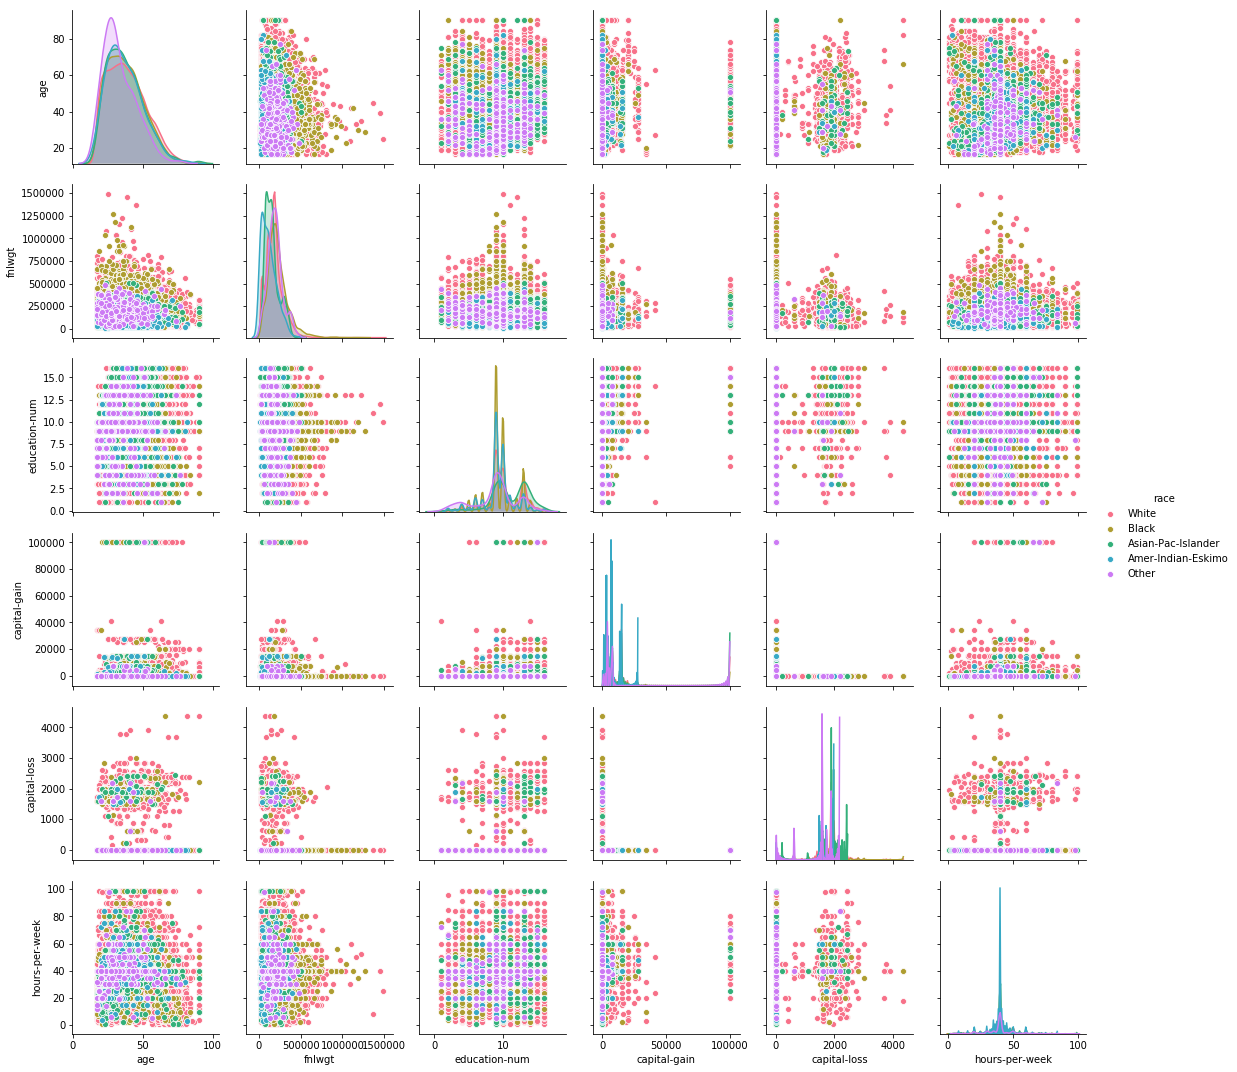

In [5]:
sns.pairplot(income_data, hue="race", palette="husl")

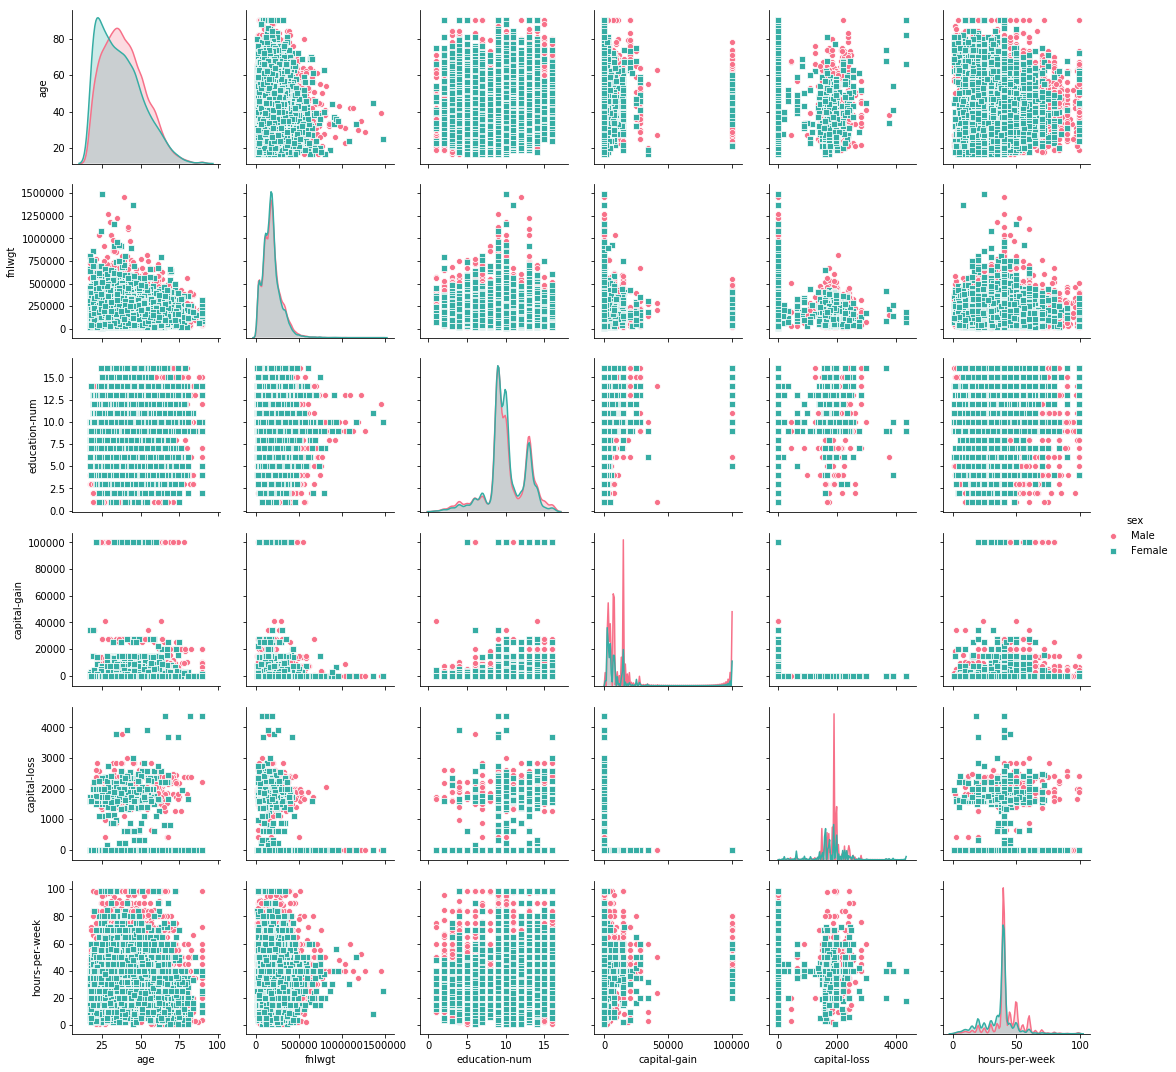

In [6]:
sns.pairplot(income_data, hue="sex", palette="husl", markers=["o", "s"])

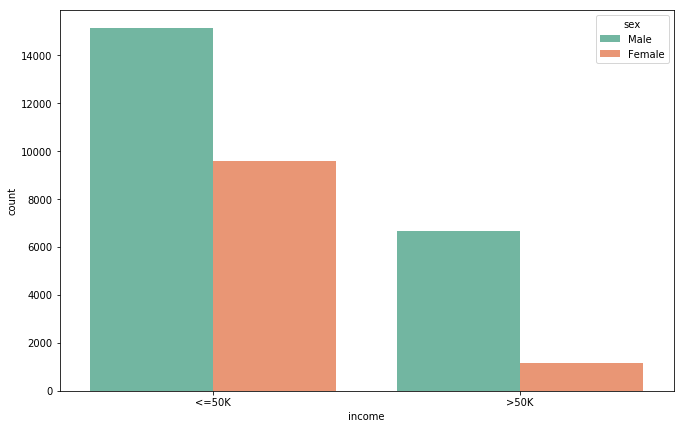

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='income',hue='sex',data=income_data,palette='Set2')

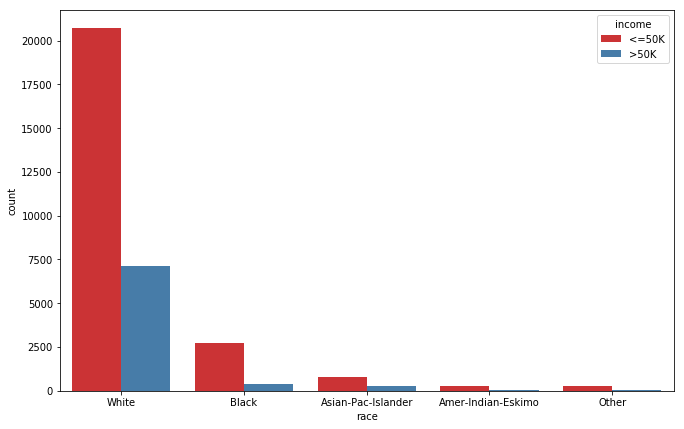

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='race',hue='income',data=income_data,palette='Set1')

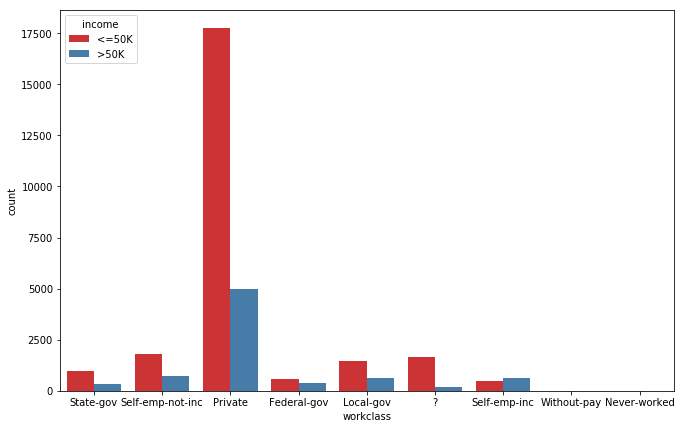

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='workclass',hue='income',data=income_data,palette='Set1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

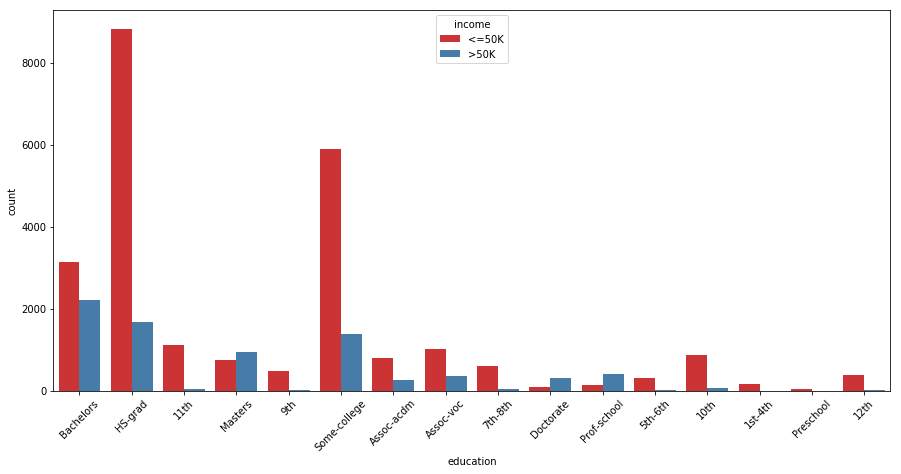

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(x='education',hue='income',data=income_data,palette='Set1')
plt.xticks(rotation=45)
#edu.set_xticklabels(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

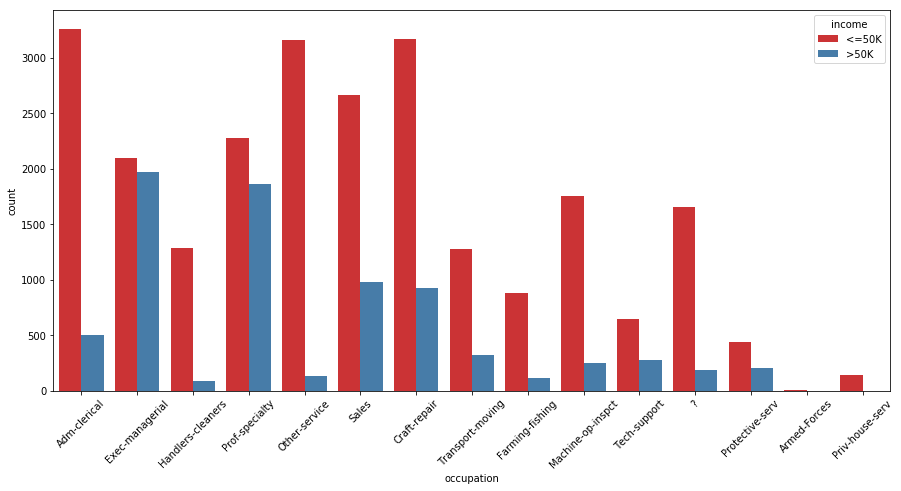

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x='occupation',hue='income',data=income_data,palette='Set1')
plt.xticks(rotation=45)

# Setting up the Data

Set up data for Decision Tree and Random Forest Classification Model!

**Check income_data.info() again.**

In [12]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Categorical Features

That means to transform them so sklearn will be able to understand them.

In [13]:
# To make sex as a feature, convert str to int
income_data["sex-int"] = income_data['sex'].apply(lambda s: 0 if s == 'Male' else 1)

In [14]:
# To make native-country as a feature, convert str to int
#print(income_data["native-country"].value_counts())
income_data["country-int"] = income_data["native-country"].apply(lambda n: 0 if n == 'United-States' else 1)

In [15]:
# data and labels for train test
X = income_data[["age", "capital-gain", "capital-loss", "hours-per-week","sex-int","country-int"]]
y = income_data[["income"]]

## Train Test Split

Time to split data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set.**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Training a Decision Tree Model

Start by training a single decision tree

** Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [20]:
tree_scores = tree.score(X_test,y_test)
print(tree_scores)

0.8189774297558728


## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [21]:
tree_pred = tree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,tree_pred))

[[4729  297]
 [ 882  605]]


In [23]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      5026
        >50K       0.67      0.41      0.51      1487

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.76      0.67      0.70      6513
weighted avg       0.80      0.82      0.80      6513



## Training the Random Forest model


**Create an instance of the RandomForestClassifier class and fit it to training data from the previous step.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier(n_estimators=600,random_state=1) #n_estimators=10

In [26]:
forest.fit(X_train,y_train)

C:\Users\tengchm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [27]:
forest_score = forest.score(X_test,y_test)
print(forest_score)
print(forest.feature_importances_)

0.822201750345463
[0.31183097 0.29195869 0.11767422 0.20565562 0.06395177 0.00892872]


## Predictions and Evaluation of Random Forrest

In [28]:
forest_pred = forest.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      5026
        >50K       0.67      0.43      0.53      1487

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.76      0.68      0.71      6513
weighted avg       0.81      0.82      0.81      6513



In [41]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      5026
        >50K       0.67      0.41      0.51      1487

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.76      0.67      0.70      6513
weighted avg       0.80      0.82      0.80      6513



In [37]:
print(confusion_matrix(y_test,forest_pred))

[[4714  312]
 [ 846  641]]


In [38]:
print(confusion_matrix(y_test,tree_pred))

[[4729  297]
 [ 882  605]]


              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      5026
        >50K       0.67      0.41      0.51      1487

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.76      0.67      0.70      6513
weighted avg       0.80      0.82      0.80      6513



# Conclusion
There is no significant difference between Random Forrest and Decision Tree